# Clean the Data

### Clean the Salary Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
# Suppress Warnings 
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('SummarizedData.csv')

In [4]:
df.shape

(16098, 9)

In [5]:
df.drop(['Unnamed: 0','Unnamed: 0.1'],axis =1,inplace =True)

In [6]:
# Clean the duplicate entries by summary
df.drop_duplicates(subset=['job_desc'], inplace=True)
df.shape

(1665, 7)

In [7]:
# Create a subset of Data where we have salaries 
df.dropna(inplace = True)
df.shape

(335, 7)

### This signifies that out of 1665 entries, only 335 have information about the salary.

In [8]:
df.reset_index(inplace =True,drop = True)

In [9]:
# Insert New Columns based on the data in the Job Description and Salary

In [10]:
# Insert Columns for Salary
try:
    df.insert(7,'Sal_High',0)
except:
    df.drop(['Sal_High'],axis =1,inplace =True)
    df.insert(7,'Sal_High',0)
    
try:
    df.insert(7,'Sal_Low',0)
except:
    df.drop(['Sal_Low'],axis=1,inplace =True)
    df.insert(7,'Sal_Low',0)

try:
    df.insert(7,'Sal_Dur','Year')
except:
    df.drop(['Sal_Dur'],axis=1,inplace =True)
    df.insert(7,'Sal_Dur','Year')
    
try:
    df.insert(7,'Sal_Convert',0)
except:
    df.drop(['Sal_Convert'],axis=1,inplace =True)
    df.insert(7,'Sal_Convert',0)


In [11]:
# Create Dummy Columns for job Type Category (Didn't implement try except yet.)
# Extract if it is permanent, contract, temporary or freelancing job and create dummy variable
df.insert(7,'Permanent',0)
df.insert(7,'Contract',0)
df.insert(7,'Temporary',0)
df.insert(7,'Freelance',0)
df.insert(7,'Nomention',0)

In [12]:
# Create dummy for Junior and Senior Category
df.insert (7,'junior',0)
df.insert (7,'senior',0)


In [13]:
df.insert (7, 'Position','Not Mentioned')

In [14]:
# Create Dummy Column for Job Industry Category. This is not a good idea since 
# the job description may contain multiple fields. Hence scraping the code.
# df.insert(7,'fintech',0)
# df.insert(7,'healthCare',0)
# df.insert(7,'government',0)
# df.insert(7,'it',0)
# df.insert(7,'consulting',0)
# df.insert(7,'telecom',0)
# df.insert(7,'finance',0)
# df.insert(7,'academ',0)

In [15]:
''' Lets Add the Dummy Category to denote if a person receives High Salary, Average Salary or Low Salary.
Low Salary is salary < mean Salary 
High Salary is salary > mean Salary 
'''
df.insert(7,'high_salary',0)
df.insert(7,'low_salary',0)
df.insert(7,'bracket',0)

In [16]:
## Clean and convert the Salary data from Object to numerical values
for i in range(len(df.Salary)):
    df['Sal_Low'].iloc[i] = df.Salary.iloc[i].split()[0]
    df['Sal_High'].iloc[i] = df.Salary.iloc[i].split()[2]
    df['Sal_Dur'].iloc[i] = df.Salary.iloc[i].split()[-1]

In [17]:
# Remove ',' and '$' from Sal High and Sal Low
df['Sal_High'] = df['Sal_High'].map(lambda x: str(x).replace('$','').replace(',',''))
df['Sal_Low'] = df['Sal_Low'].map(lambda x: str(x).replace('$','').replace(',',''))

Some of the rows do not have Low and High Salary. For them, there is only single value. This is stored in Sal_Low column. The Corresponding Sal_High Column contains some text. We can replace the text with Nulls and then duplicate the amount from column Sal_Low so that mean value will be correct.

In [18]:
# Convert to float
def sal_splitter(row):
    try:
        return float(row)
    except:
        return None

In [19]:
df.Sal_High = df.Sal_High.apply(sal_splitter)

In [20]:
df.Sal_High.fillna(df.Sal_Low, inplace =True)

In [21]:
df.Sal_High = df.Sal_High.astype('float')

In [22]:
df.Sal_Low = df.Sal_Low.astype('float')

In [23]:
df['Sal_Avg'] = (df.Sal_High+df.Sal_Low)/2

### Now Convert Daily, Hourly, Weekly rates into yearly rates. We consider 50 Weeks a year, 250 days an year (50 x 5) and  2000 Hours an year (250 X 8).

In [24]:
for i in range(len(df)):
    if df.Sal_Dur[i] == 'year':
        df.Sal_Convert.iloc[i] = df.Sal_Avg.iloc[i]
    elif df.Sal_Dur[i] == 'week':
        df.Sal_Convert.iloc[i] = df.Sal_Avg.iloc[i]*50
    elif df.Sal_Dur[i] == 'day':
        df.Sal_Convert.iloc[i] = df.Sal_Avg.iloc[i]*250
    elif df.Sal_Dur[i] == 'hour':
        df.Sal_Convert.iloc[i] = df.Sal_Avg.iloc[i]*2000

In [25]:
# Finally Dummify the Job Search Term, and Job Location
dummy_col = pd.Series(['job_loc','job_search_term'])
pd.get_dummies(df,columns=dummy_col,drop_first=True)

,jobtitle,joburl,company,Salary,job_desc,bracket,low_salary,high_salary,Position,senior,...,Sal_Low,Sal_High,Sal_Avg,job_loc_Brisbane+QLD,job_loc_Melbourne+VIC,job_loc_Perth+WA,job_loc_Sydney+NSW,job_search_term_Data+Analyst,job_search_term_Data+Engineer,job_search_term_Data+Scientist
0,Machine learning software developer,https://au.indeed.com//pagead/clk?mo=r&ad=-6NY...,AInsoff,"$100,000 - $200,000 a year","$100,000 - $200,000 a yearContractMachine lear...",0,0,0,Not Mentioned,0,...,100000.00,200000.00,150000.000,0,0,0,1,0,0,1
1,Hospital Scientist - Cytology,https://au.indeed.com//rc/clk?jk=b0c1bc9da5125...,NSW Health Pathology,$31.62 - $45.81 an hour,"$31.62 - $45.81 an hourPart-time, PermanentEmp...",0,0,0,Not Mentioned,0,...,31.62,45.81,38.715,0,0,0,1,0,0,1
2,Data Scientist,https://au.indeed.com//rc/clk?jk=bddee12fba022...,Freelancer.com,"$65,000 - $110,000 a year","$65,000 - $110,000 a yearEleven-time Webby awa...",0,0,0,Not Mentioned,0,...,65000.00,110000.00,87500.000,0,0,0,1,0,0,1
3,Data Scientist - Higher Education,https://au.indeed.com//rc/clk?jk=65d1c1f374d81...,Hudson,$110 - $120 a day,"$110 - $120 a dayTemporary, Contract2 x Data S...",0,0,0,Not Mentioned,0,...,110.00,120.00,115.000,0,0,0,1,0,0,1
4,Statistician / Epidemlologist,https://au.indeed.com//rc/clk?jk=23eda781184d6...,University of New South Wales,"$93,000 - $101,000 a year","$93,000 - $101,000 a yearContractJob no: 49614...",0,0,0,Not Mentioned,0,...,93000.00,101000.00,97000.000,0,0,0,1,0,0,1
5,Data Scientist,https://au.indeed.com//rc/clk?jk=a6e9dbf5f7202...,Talent International,"$80,000 - $120,000 a year","$80,000 - $120,000 a yearData Scientist - Cogn...",0,0,0,Not Mentioned,0,...,80000.00,120000.00,100000.000,0,0,0,1,0,0,1
6,Senior Hospital Scientist,https://au.indeed.com//rc/clk?jk=c41aa8a2a5c71...,NSW Health Pathology,"$97,719 - $129,279 a year","$97,719 - $129,279 a yearPermanentEmployment T...",0,0,0,Not Mentioned,0,...,97719.00,129279.00,113499.000,0,0,0,1,0,0,1
7,Machine learning software developer,https://au.indeed.com//pagead/clk?mo=r&ad=-6NY...,AInsoff,"$100,000 - $200,000 a year","Sydney NSWContract$100,000 - $200,000 a yearMa...",0,0,0,Not Mentioned,0,...,100000.00,200000.00,150000.000,0,0,0,1,0,0,1
8,Senior Data Scientist - Location & Segment Ana...,https://au.indeed.com//rc/clk?jk=59c4c0b477e73...,Talent International,"$145,000 - $155,000 a year","$145,000 - $155,000 a yearSenior Data Scientis...",0,0,0,Not Mentioned,0,...,145000.00,155000.00,150000.000,0,0,0,1,0,0,1
9,Senior Data Scientist,https://au.indeed.com//rc/clk?jk=b8bc95115ba31...,Morgan McKinley,"$120,000 - $160,000 a year","$120,000 - $160,000 a yearPermanentJoin an inn...",0,0,0,Not Mentioned,0,...,120000.00,160000.00,140000.000,0,0,0,1,0,0,1


In [26]:
## Now we fill the Columns related to industry

In [27]:
## Scraped Code since an ad can belong to multiple industries
# for j in range(len(df)):
#     if 'academ' in df['job_desc'][j].lower():
#         df.academ.iloc[j] = 1
#     elif 'finance' in df['job_desc'][j].lower():
#         df.finance.iloc[j] = 1
#     elif 'telecom' in df['job_desc'][j].lower():
#         df.Permanent.iloc[j] = 1
#     elif 'consulting' in df['job_desc'][j].lower():
#         df.Permanent.iloc[j] = 1
#     elif 'IT' in df['job_desc'][j]:
#         df.Permanent.iloc[j] = 1
#     elif 'government' in df['job_desc'][j].lower():
#         df.Permanent.iloc[j] = 1
#     elif 'healthcare' in df['job_desc'][j].lower():
#         df.Permanent.iloc[j] = 1
#     elif 'fintech' in df['job_desc'][j].lower():
#         df.Permanent.iloc[j] = 1
    # else:                                  # Uncomment for one hot encoding. 
#       df.Nomention.iloc[j] = 1
      

## Let's fill the columns related to Job Type

In [28]:
for j in range(len(df)):
    if 'permanent' in df['job_desc'][j].lower():
        df.Permanent.iloc[j] = 1
    elif 'contract' in df['job_desc'][j].lower():
        df.Contract.iloc[j] = 1
    elif 'temporary' in df['job_desc'][j].lower():
        df.Temporary.iloc[j] = 1
    elif 'freelance' in df['job_desc'][j].lower():
        df.Freelance.iloc[j] = 1
#     else:                                  # Uncomment for one hot encoding. 
#         df.Nomention.iloc[j] = 1
        


In [29]:
sum(df['Permanent'])

105

In [30]:
# Let's Fill the Columns related to senior or junior position

In [31]:
for j in range(len(df)):
    if 'junior' in df['job_desc'][j].lower():   
        # Checking for Junior first as a job will most likely contian words like 
        # Junior Data Scientist with mentoring available from Senior person. 
        # For a senior position, there shouldn't be a mention of the word 'junior'. 
        df.junior.iloc[j] = 1
        df.Position.iloc[j] = 'Junior'
    elif 'senior' in df['job_desc'][j].lower():
        df.senior.iloc[j] = 1
        df.Position.iloc[j] = 'Senior'

[Text(0,0.5,'Average Salary'), Text(0.5,0,'Job Title')]

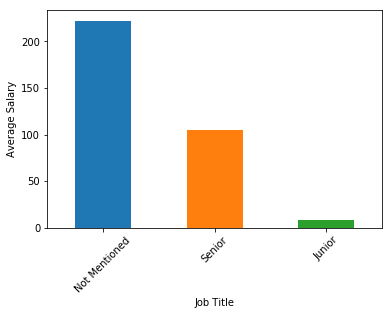

In [32]:

ax = df.Position.value_counts().plot(kind = 'bar',rot = 45)
ax.set(ylabel = 'Average Salary',xlabel = 'Job Title')

[Text(0,0.5,'Number of Jobs'), Text(0.5,0,'Salary category')]

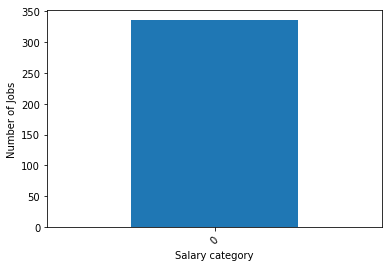

In [33]:

ax = df.bracket.value_counts().plot(kind = 'bar',rot = 45)
ax.set(ylabel = 'Number of Jobs',xlabel = 'Salary category')

###  Finally Lets clean the Job Description to remove any dollar values as this would be unnecessary information and possibly duplicate information when we do NLP. Duplicates are bad as they create multi collinearity and bring associted problems while modelling.


In [34]:
# Remove $ values from the job description Using Regex
for k in range(len(df)):
    df['job_desc'].iloc[k] = re.sub('(\$\d*,\d*)','',df['job_desc'].iloc[k])
for k in range(len(df)):
    df['job_desc'].iloc[k] = re.sub('(\$\d*)','',df['job_desc'].iloc[k])
for k in range(len(df)):
    df['job_desc'].iloc[k] = re.sub('(\$\d*.\d.)','',df['job_desc'].iloc[k])

In [35]:
'''Populate the High Salary, average Salary and Low Salary Columns. 
IMP : This is manual one hot encoding which will be used for classification modling. 
Be careful while doing any linear or logistic modelling and make sure to avoid by 
multicollinearity of taking these columns as predictors '''

for i in range(len(df)):
    if df.Sal_Convert[i]<round(df.Sal_Convert.mean()):
        df.low_salary[i] = 1
        df.bracket[i] = 'Low'
    else:
        df.high_salary[i] = 1
        df.bracket[i] = 'High'

In [36]:
df.bracket.unique()

array(['High', 'Low'], dtype=object)

### Finally Let's Save the cleaned file.

In [37]:
df.to_csv('Cleaned_Data.csv')

# Now We do the EDA

In [38]:
avg_sal_job = df.groupby(['job_search_term']).mean()['Sal_Convert']

[Text(0,0.5,'Average Salary'), Text(0.5,0,'Job Title')]

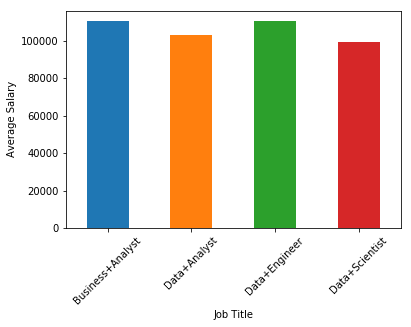

In [39]:
ax = avg_sal_job.plot(kind = 'bar',rot = 45)
ax.set(ylabel = 'Average Salary',xlabel = 'Job Title')

In [40]:
avg_sal_loc = df.groupby(['job_loc']).mean()['Sal_Convert']

[Text(0,0.5,'Average Salary'), Text(0.5,0,'Job Location')]

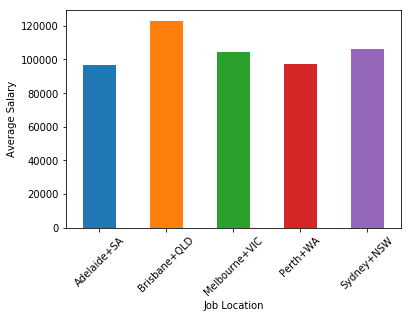

In [41]:
ax = avg_sal_loc.plot(kind = 'bar',rot = 45)
ax.set(xlabel = 'Job Location', ylabel = 'Average Salary')

[Text(0.5,0,'Salary'), Text(0.5,1,'Salary Histogram for Data Scientist')]

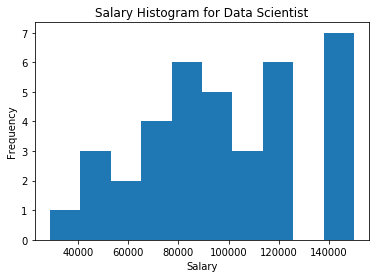

In [42]:
ax =df[df.job_search_term=='Data+Scientist']['Sal_Convert'].plot(kind ='hist')
ax.set(xlabel = 'Salary',title = 'Salary Histogram for Data Scientist')

It seems that there is group of senior data scientist who earn more than \$100 K. For data scientist in general, the distribution is normal with mean near $ 80,000.

[Text(0.5,0,'salary'), Text(0.5,1,'Salary Histogram for Data Engineer')]

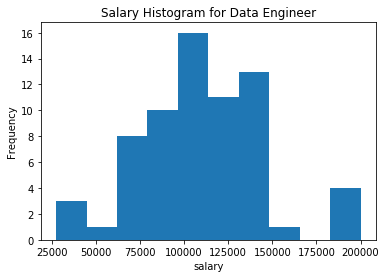

In [43]:
ax = df[df.job_search_term=='Data+Engineer']['Sal_Convert'].plot(kind ='hist')
ax.set(xlabel = 'salary',title = 'Salary Histogram for Data Engineer')

[Text(0.5,0,'Salary'), Text(0.5,1,'Salary Histogram for Data Analyst')]

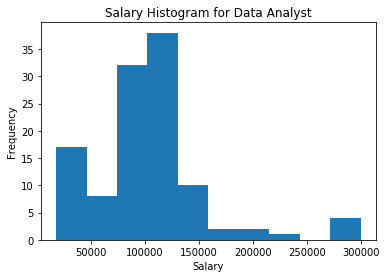

In [44]:
ax = df[df.job_search_term=='Data+Analyst']['Sal_Convert'].plot(kind ='hist')
ax.set(xlabel = 'Salary', title = 'Salary Histogram for Data Analyst')

[Text(0.5,0,'Salary'), Text(0.5,1,'Salary Histogram for Business Analyst')]

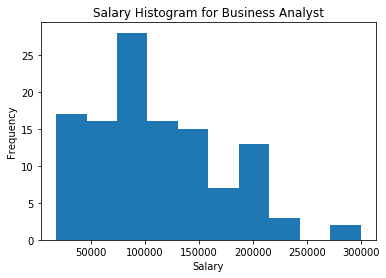

In [45]:
ax = df[df.job_search_term=='Business+Analyst']['Sal_Convert'].plot(kind ='hist')
ax.set(xlabel = 'Salary', title = 'Salary Histogram for Business Analyst')

In [46]:
# We Also Find Which Jobs pay highest money
ds_max = max(df[df.job_search_term=='Data+Scientist']['Sal_Convert'])
da_max = max(df[df.job_search_term=='Data+Analyst']['Sal_Convert'])
de_max = max(df[df.job_search_term=='Data+Engineer']['Sal_Convert'])
ba_max = max(df[df.job_search_term=='Business+Analyst']['Sal_Convert'])
print('The maximum salary for Data Scientist = ',ds_max)
print('The maximum salary for Data Analyst = ',da_max)
print('The maximum salary for Data Engineer = ',de_max)
print('The maximum salary for Business Analyst = ',ba_max)

The maximum salary for Data Scientist =  150000.0
The maximum salary for Data Analyst =  300000.0
The maximum salary for Data Engineer =  200000.0
The maximum salary for Business Analyst =  300000.0


In [47]:
# We Also Find What is an average pay across the Job
ds_avg = round(np.mean(df[df.job_search_term=='Data+Scientist']['Sal_Convert']))
da_avg = round(np.mean(df[df.job_search_term=='Data+Analyst']['Sal_Convert']))
de_avg = round(np.mean(df[df.job_search_term=='Data+Engineer']['Sal_Convert']))
ba_avg = round(np.mean(df[df.job_search_term=='Business+Analyst']['Sal_Convert']))
print('The average salary for Data Scientist = ',ds_avg)
print('The average salary for Data Analyst = ',da_avg)
print('The average salary for Data Engineer = ',de_avg)
print('The average salary for Business Analyst = ',ba_avg)

The average salary for Data Scientist =  99446
The average salary for Data Analyst =  103335
The average salary for Data Engineer =  110602
The average salary for Business Analyst =  110567


In [48]:
# We Also Find What is an median pay across the Job
ds_med = round(np.median(df[df.job_search_term=='Data+Scientist']['Sal_Convert']))
da_med = round(np.median(df[df.job_search_term=='Data+Analyst']['Sal_Convert']))
de_med = round(np.median(df[df.job_search_term=='Data+Engineer']['Sal_Convert']))
ba_med = round(np.median(df[df.job_search_term=='Business+Analyst']['Sal_Convert']))
print('The median salary for Data Scientist = ',ds_med)
print('The median salary for Data Analyst = ',da_med)
print('The median salary for Data Engineer = ',de_med)
print('The median salary for Business Analyst = ',ba_med)

The median salary for Data Scientist =  100000.0
The median salary for Data Analyst =  102462.0
The median salary for Data Engineer =  106250.0
The median salary for Business Analyst =  97000.0


In [49]:
# We Also Find What is an median pay across the Job
ds_med = round(np.median(df[df.job_search_term=='Data+Scientist']['Sal_Convert']))
da_med = round(np.median(df[df.job_search_term=='Data+Analyst']['Sal_Convert']))
de_med = round(np.median(df[df.job_search_term=='Data+Engineer']['Sal_Convert']))
ba_med = round(np.median(df[df.job_search_term=='Business+Analyst']['Sal_Convert']))
print('The median salary for Data Scientist = ',ds_med)
print('The median salary for Data Analyst = ',da_med)
print('The median salary for Data Engineer = ',de_med)
print('The median salary for Business Analyst = ',ba_med)

The median salary for Data Scientist =  100000.0
The median salary for Data Analyst =  102462.0
The median salary for Data Engineer =  106250.0
The median salary for Business Analyst =  97000.0


In [50]:
ds_count = df[df.job_search_term=='Data+Scientist']['Salary'].count()
da_count = df[df.job_search_term=='Data+Analyst']['Salary'].count()
de_count = df[df.job_search_term=='Data+Engineer']['Salary'].count()
ba_count = df[df.job_search_term=='Business+Analyst']['Salary'].count()
print('The number of records for Data Scientist  = ',ds_count)
print('The number of records for Data Analyst  = ',da_count)
print('The number of records for Data Engineer  = ',de_count)
print('The number of records for Business Analyst  = ',ba_count)

The number of records for Data Scientist  =  37
The number of records for Data Analyst  =  114
The number of records for Data Engineer  =  67
The number of records for Business Analyst  =  117
